Predicting Survival in the Titanic Data Set. We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [107]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

titanic = pd.read_csv(url)

In [108]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic.shape

(891, 12)

In [109]:
# Since we are asked to use only specific columns, let us drop the others
# Survived column is kept as it is the target column

titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [15]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [18]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [24]:
for i in ["Survived", "Pclass", "Sex"]:
    
    print("The value count for categorical column {} is :".format(i))
    print(titanic[i].value_counts())
    print("\n")

The value count for categorical column Survived is :
0    549
1    342
Name: Survived, dtype: int64


The value count for categorical column Pclass is :
3    491
1    216
2    184
Name: Pclass, dtype: int64


The value count for categorical column Sex is :
male      577
female    314
Name: Sex, dtype: int64




The data contains 177 missing values in Age column.

In [110]:
titanic.Sex.replace({"male" : 0, "female" : 1}, inplace = True)

In [111]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


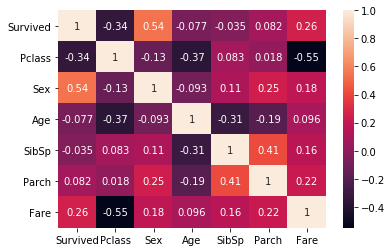

In [39]:
sns.heatmap(titanic.corr(), annot = True)

The map doesn't reveal much significant, but that Fare and Pclass seems to be related which is expected since lower class people would be paying less then high class people. Also, being a male or female can affect your chances of surviving as depicted by the 0.54 correlation value.

In [40]:
titanic.groupby("Pclass").mean()

,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,0.629630,0.435185,38.233441,0.416667,0.356481,84.154687
2,0.472826,0.413043,29.877630,0.402174,0.380435,20.662183
3,0.242363,0.293279,25.140620,0.615071,0.393075,13.675550


The above groupby tell us that 1st class passengers had the highest chance of survival. And the males from the 1st class also survived more on average, compared to other class male passengers. It also shows that 1st class passengers paid more than other classes.

The 3rd class passengers had comparatively more average siblings on board.

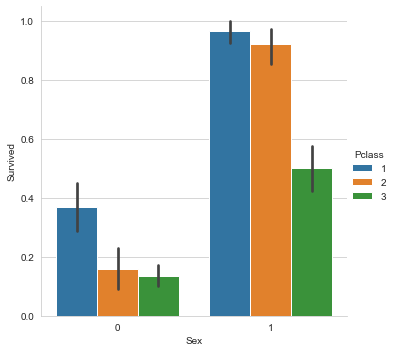

In [70]:
sns.catplot(x = "Sex", y = "Survived", hue = "Pclass", kind = "bar", data = titanic)

A very informative visual showing that 1st class passengers (either male or female) had the highest chances of survival.

Chances of female surviving were way more than males.

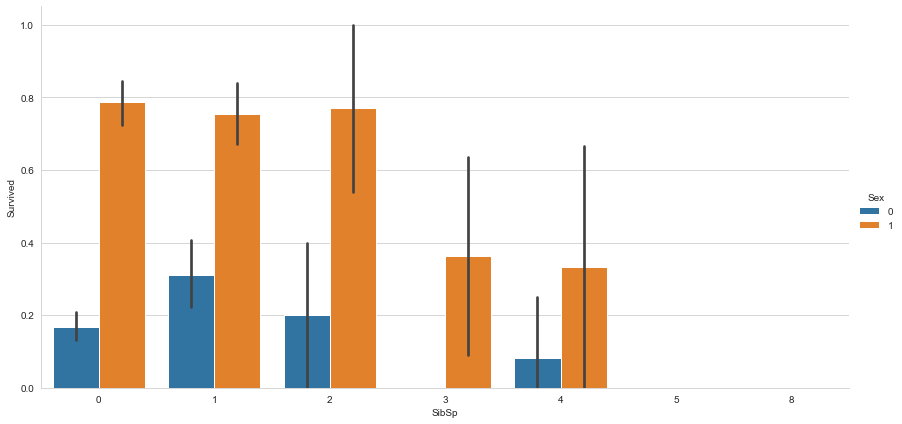

In [71]:

sns.catplot(x = "SibSp", y = "Survived", hue = "Sex", kind = "bar", data = titanic, height = 6, aspect = 2)

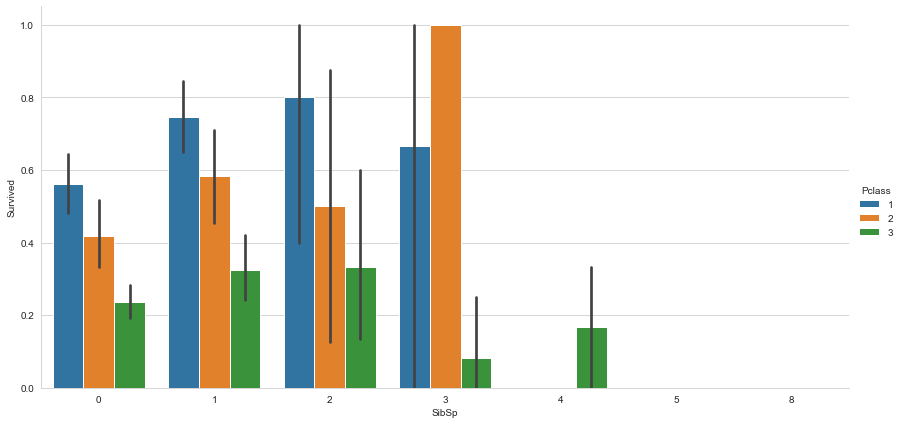

In [72]:

sns.catplot(x = "SibSp", y = "Survived", hue = "Pclass", kind = "bar", data = titanic, height = 6, aspect = 2)

It is clear that females had a high chance of survival than males. But also, people with high numnber of siblings on board did not survive. Mostly 1st class people had more chances of survival. But with  3 siblings, other classes had better chances. 

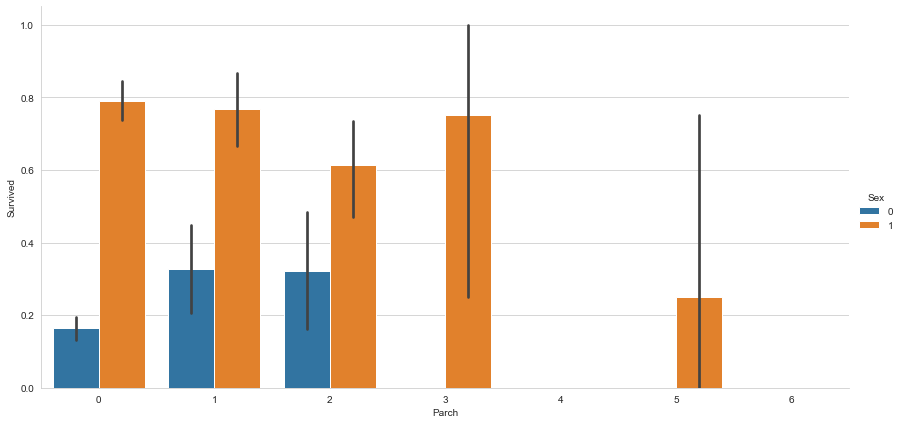

In [73]:

sns.catplot(x = "Parch", y = "Survived", hue = "Sex", kind = "bar", data = titanic, height = 6, aspect = 2)

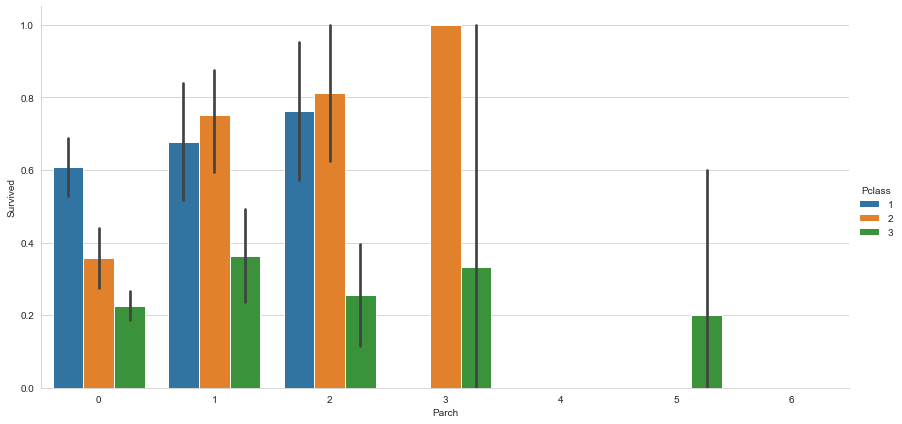

In [74]:

sns.catplot(x = "Parch", y = "Survived", hue = "Pclass", kind = "bar", data = titanic, height = 6, aspect = 2)

People of 1st class having 0, 1 or 2 parents and/or children aboard had good chances of survival.
For parch value of 3, 2nd class people had great chances of survival.
For parch value of 5, 3rd class survived (which is because mostly 3rd class people had that many related people on board).

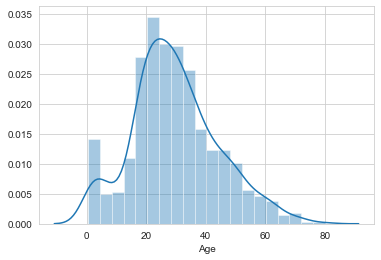

In [75]:
sns.distplot(titanic["Age"])

Age seems to be somewhat normally distributed with peak around 20 - 40 years. 

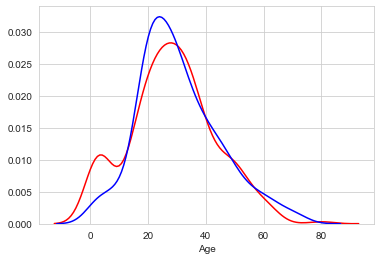

In [79]:
sns.distplot(titanic["Age"][titanic["Survived"] == 1], hist = False, color = "r")
sns.distplot(titanic["Age"][titanic["Survived"] == 0], hist = False, color = "b")

Since the ship has most people of around 20-40 age, both the survived and non survived people belonged to this range.
Children (less than 12 years of age) had more chances to survive.


In [112]:
# We can create a new column with Parch and SibSp since both represent the related family member of a person.

titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,0


Since FamilySize is better representing the related kins of a person, we can remove the redundant columns of Parch and SibSp.

In [113]:
titanic = titanic.drop(["Parch", "SibSp"], axis = 1)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize
0,0,3,0,22.0,7.2500,1
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,1
4,0,3,0,35.0,8.0500,0


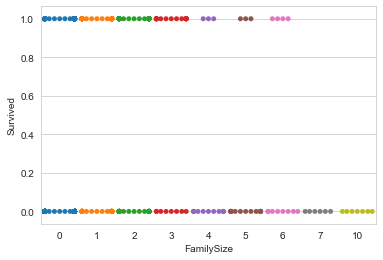

In [89]:
sns.swarmplot(x = "FamilySize", y = "Survived", data = titanic)

People having a large Family on board had less survival chances.

In [115]:
# Filling Age column missing values with the mean age.

age_mean = titanic["Age"].mean()

titanic["Age"].fillna(age_mean, inplace = True)


In [122]:
age_mean

29.69911764705882

In [117]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [94]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

C:\Users\tanvi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [118]:
y = titanic["Survived"]
x = titanic.drop("Survived", axis = 1)

In [119]:
x.head()

,Pclass,Sex,Age,Fare,FamilySize
0,3,0,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


In [120]:
#  We do not need to perform scaling in decision trees.

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state= 42)

In [121]:
clf = DecisionTreeClassifier()


In [101]:
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

TypeError: float() argument must be a string or a number, not 'method'